In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [83]:
# Load training data
train_df_ori = pd.read_csv('train.csv')

# Load test data

test_df_ori = pd.read_csv('test.csv')

In [84]:
train_df_ori.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [85]:
test_df_ori.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


After reading the dataset docs (https://www.kaggle.com/competitions/spaceship-titanic/data), 

the cabin takes deck/num/side -> split them into different columns

In [186]:
train_df = train_df_ori.copy()
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
train_df['Deck'].fillna(0, inplace=True)
train_df['Num'].fillna(0, inplace=True)
train_df['Side'].fillna(0, inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [187]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
count,8693,8492,8476,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693,8693,8693.0,8693
unique,8693,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,9,1818.0,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,0.0,S
freq,1,4602,5439,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378,2794,199.0,4288
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN,NaN,NaN,NaN


After checking, dataframe must be filled with values

Filling HomePlanet with mode ("Earth")

In [188]:
print(train_df['HomePlanet'].mode())
print(train_df['CryoSleep'].mode())


0    Earth
Name: HomePlanet, dtype: object
0    False
Name: CryoSleep, dtype: object


In [189]:
train_df['HomePlanet'].fillna('Earth', inplace=True)
train_df['CryoSleep'].fillna('Earth', inplace=True)

Having a closer look on Destination field and see if the HomePlanet is affecting the destination

In [190]:
train_df["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

<Axes: xlabel='HomePlanet', ylabel='Destination'>

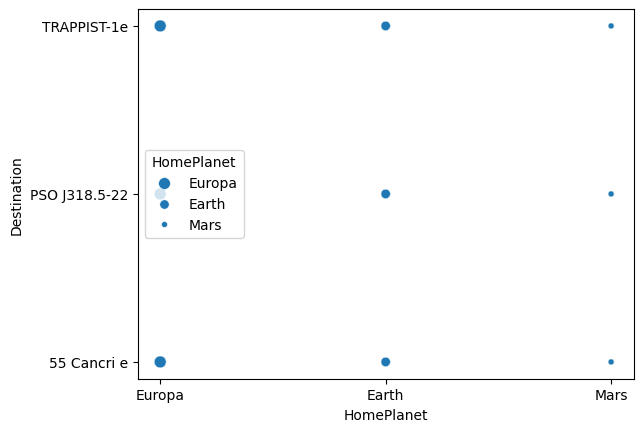

In [191]:
sns.scatterplot(data=train_df, x='HomePlanet', y='Destination', size='HomePlanet')

In [192]:
print(train_df[train_df['HomePlanet'] == 'Europa']['Destination'].mode())
print(train_df[train_df['HomePlanet'] == 'Earth']['Destination'].mode())
print(train_df[train_df['HomePlanet'] == 'Mars']['Destination'].mode())

0    TRAPPIST-1e
Name: Destination, dtype: object
0    TRAPPIST-1e
Name: Destination, dtype: object
0    TRAPPIST-1e
Name: Destination, dtype: object


In [193]:
train_df['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [194]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
count,8693,8693,8693,8693,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693,8693,8693.0,8693
unique,8693,3,3,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,9,1818.0,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,0.0,S
freq,1,4803,5439,6097,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378,2794,199.0,4288
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN,NaN,NaN,NaN


In [195]:
train_df['HomePlanet'].value_counts(dropna=False)

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [196]:
train_df['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

Observing the 'Age' column -> Idea: include the average age. Maybe can go detail further and see if there is any correlation with any column

In [197]:
train_df[train_df['Age'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
50,0052_01,Earth,False,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False,G,6,S
64,0068_01,Mars,False,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False,E,4,S
137,0149_01,Earth,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True,G,27,S
181,0202_02,Europa,False,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True,A,2,P
184,0206_01,Europa,False,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True,C,9,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,False,G,1425,S
8301,8862_03,Europa,True,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Alchib Myling,True,C,329,S
8374,8956_04,Earth,False,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False,G,1453,P
8407,8988_01,Earth,True,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Maen Fowlesterez,True,G,1448,S


In [198]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [199]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [200]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
count,8693,8693,8693,8693,8693.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693,8693,8693.0,8693
unique,8693,3,3,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,9,1818.0,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,0.0,S
freq,1,4803,5439,6097,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378,2794,199.0,4288
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.339054,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN,NaN,NaN,NaN


For RoomService, FoodCourt, ShoppingMall, Spa, VRDeck -> try to use 0

In [201]:
print(train_df['RoomService'].isna().sum())
print(train_df['FoodCourt'].isna().sum())
print(train_df['ShoppingMall'].isna().sum())
print(train_df['Spa'].isna().sum())
print(train_df['VRDeck'].isna().sum())

181
183
208
183
188


In [202]:
train_df['RoomService'].fillna(0, inplace=True)
train_df['ShoppingMall'].fillna(0, inplace=True)
train_df['Spa'].fillna(0, inplace=True)
train_df['VRDeck'].fillna(0, inplace=True)

In [203]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
count,8693,8693,8693,8693,8693.000000,8490,8693.000000,8510.000000,8693.000000,8693.000000,8693.000000,8493,8693,8693,8693.0,8693
unique,8693,3,3,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,9,1818.0,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,0.0,S
freq,1,4803,5439,6097,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378,2794,199.0,4288
mean,NaN,NaN,NaN,NaN,28.827930,NaN,220.009318,458.077203,169.572300,304.588865,298.261820,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.339054,NaN,660.519050,1611.489240,598.007164,1125.562559,1134.126417,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,76.000000,22.000000,53.000000,40.000000,NaN,NaN,NaN,NaN,NaN


Observing the VIP column, maybe we can see first the effect on whether the person is a VIP or not

In [204]:
train_df["VIP"] = train_df["VIP"].apply(lambda x: 0 if pd.isna(x) else 1)

In [205]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
count,8693,8693,8693,8693,8693.000000,8693.000000,8693.000000,8510.000000,8693.000000,8693.000000,8693.000000,8493,8693,8693,8693.0,8693
unique,8693,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8473,2,9,1818.0,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,0.0,S
freq,1,4803,5439,6097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4378,2794,199.0,4288
mean,NaN,NaN,NaN,NaN,28.827930,0.976648,220.009318,458.077203,169.572300,304.588865,298.261820,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.339054,0.151028,660.519050,1611.489240,598.007164,1125.562559,1134.126417,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,1.000000,41.000000,76.000000,22.000000,53.000000,40.000000,NaN,NaN,NaN,NaN,NaN


In [206]:
train_df.drop(columns=['Name'], inplace=True)

In [215]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
count,8693,8693,8693,8693,8693.000000,8693.000000,8693.000000,8510.000000,8693.000000,8693.000000,8693.000000,8693,8693,8693.0,8693
unique,8693,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9,1818.0,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,F,0.0,S
freq,1,4803,5439,6097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4378,2794,199.0,4288
mean,NaN,NaN,NaN,NaN,28.827930,0.976648,220.009318,458.077203,169.572300,304.588865,298.261820,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.339054,0.151028,660.519050,1611.489240,598.007164,1125.562559,1134.126417,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,1.000000,41.000000,76.000000,22.000000,53.000000,40.000000,NaN,NaN,NaN,NaN


Encode categorical into numerical values

In [217]:
enc = sklearn.preprocessing.OrdinalEncoder()
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck', 'Side']
train_df[categorical_cols] = train_df[categorical_cols].astype(str)
train_df[categorical_cols] = enc.fit_transform(train_df[categorical_cols])

In [218]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(train_df.drop(columns=['Transported']), train_df['Transported'])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [223]:
def preprocessDataframe(df):
    df = df.copy()
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['Deck'].fillna(0, inplace=True)
    df['Num'].fillna(0, inplace=True)
    df['Side'].fillna(0, inplace=True)
    df.drop(columns=['Cabin'], inplace=True)

    df['HomePlanet'].fillna('Earth', inplace=True)
    df['CryoSleep'].fillna('Earth', inplace=True)

    df['Destination'].fillna('TRAPPIST-1e', inplace=True)

    df['Age'].fillna(df['Age'].mean(), inplace=True)

    df['RoomService'].fillna(0, inplace=True)
    df['FoodCourt'].fillna(0, inplace=True)
    df['ShoppingMall'].fillna(0, inplace=True)
    df['Spa'].fillna(0, inplace=True)
    df['VRDeck'].fillna(0, inplace=True)

    df["VIP"] = df["VIP"].apply(lambda x: 0 if pd.isna(x) else 1)

    if 'Name' in df.columns:
        df.drop(columns=['Name'], inplace=True)

    categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Deck', 'Side']
    df[categorical_cols] = df[categorical_cols].astype(str)
    df[categorical_cols] = enc.transform(df[categorical_cols])

    return df

In [225]:
test_df = preprocessDataframe(test_df_ori)

In [226]:
test_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
count,4277,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.0,4277.000000
unique,4277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506.0,NaN
top,0013_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN
mean,NaN,0.666823,1.339256,1.516016,28.658146,0.978256,215.062427,428.592238,173.233107,295.895955,304.898293,5.228431,NaN,1.465981
std,NaN,0.809240,0.517409,0.801973,14.027384,0.145864,601.914503,1510.155974,554.991776,1104.872018,1235.991811,1.882407,NaN,0.543759
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,NaN,1.000000
50%,NaN,0.000000,1.000000,2.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN,1.000000
75%,NaN,1.000000,2.000000,2.000000,37.000000,1.000000,48.000000,66.000000,27.000000,43.000000,31.000000,7.000000,NaN,2.000000


In [227]:
model.predict(test_df)

array([ True, False,  True, ...,  True, False,  True], shape=(4277,))

In [229]:
submissionDF = test_df_ori[['PassengerId']].copy()
submissionDF['Transported'] = model.predict(test_df)
submissionDF.to_csv('submission.csv', index=False)